# Rejection sampling 

Ransalu Senanayake

In [1]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

from sklearn.neighbors.kde import KernelDensity

In [2]:
def normal_pdf(z, mu, sigma):
    
    constant = 1/np.sqrt(2*np.pi*sigma**2)
    y_pdf = constant * np.exp(- ((z-mu)**2) / (2*sigma**2))
    
    return y_pdf

def complex_pdf(z):
    p_z = 0.4*normal_pdf(z, -3, 1) + 0.6*normal_pdf(z, 1, 1)
    return p_z 

Let's consider $p(z) = \frac{\tilde{p}(z)}{Z_p}$ where $Z_p$ is an unknown normalizing constant. 

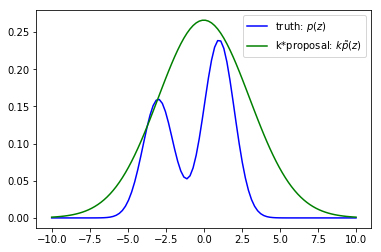

In [3]:
z = np.linspace(-10,10,100)

# We want to obtain samples from this distribution p(z) 
p = complex_pdf(z)

# Let's consider a propasal distribution q(z)
k = 2 # k is chosen such that k*q(z) >= pt(z)
q_mu, q_sig = 0, 3
kq = k*normal_pdf(z, q_mu, q_sig)

#Plot
pl.plot(z, p, c='b', label='truth: '+r'$p(z)$')
pl.plot(z, kq, c='g', label='k*proposal: '+r'$k\tilde{p}(z)$')
pl.legend()

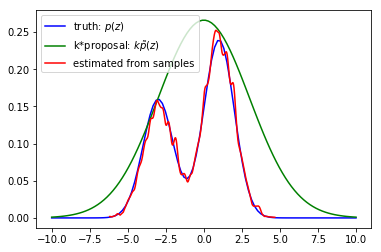

In [6]:
N = 10000
keep = []
for i in range(N):
    z0 = np.random.normal(loc=q_mu, scale=q_sig, size=1) # draw a sample from q
    
    k_q_z0 = k*normal_pdf(z0, q_mu, q_sig) # evaluate k(q(z0))
    u0 = np.random.uniform(low=0, high=k_q_z0, size=1) # draw from a uniform distribution

    p_z0 = complex_pdf(z0) #evaluate p(z0)

    if u0 <= p_z0: #keep if in the region
        keep.append(z0[0])

#Let's use KDE to get a continuous representation of the distribution from samples 
keep = np.sort(np.array(keep))[:,None]
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(keep)
q_veri = np.exp(kde.score_samples(keep))

pl.plot(z, p, c='b', label='truth: '+r'$p(z)$')
pl.plot(z, kq, c='g', label='k*proposal: '+r'$k\tilde{p}(z)$')
pl.plot(keep.ravel(), q_veri, c='r', label='estimated from samples')
pl.legend()